In [1]:
import numpy as np
import scipy.stats as stats
import scipy.linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [2]:
M1 = np.array([[1/4, 3/4, 0, 0], [1/2, 0, 1/2, 0], [0, 1/2, 0, 1/2],
               [0, 0, 3/4, 1/4]])
M2 = np.array([[2/9, 1/3, 0, 4/9], [4/9, 1/9, 0, 4/9], [2/9, 2/9, 2/9, 1/3],
               [2/9, 2/9, 4/9, 1/9]])
M3 = np.array([[4/9, 0, 2/9, 1/3], [0, 4/9, 2/9, 1/3], [0, 2/3, 0, 1/3],
               [4/9, 2/9, 2/9, 1/9]])

In [3]:
#Стационарное распределение - левый собственный вектор с с.з. = 1
def stationary(M):
    evals, evecs = np.linalg.eig(M.T)
    evec1 = evecs[:,np.isclose(evals, 1)]
    evec1 = evec1[:,0]

    stationary = evec1 / evec1.sum()
    stationary = stationary.real
    
    return stationary 

<h4> Найдем стационарные распредления 

In [4]:
stationary(M1)

array([0.2, 0.3, 0.3, 0.2])

In [5]:
stationary(M2)

array([0.27272727, 0.22727273, 0.18181818, 0.31818182])

In [6]:
stationary(M3)

array([0.21818182, 0.32727273, 0.18181818, 0.27272727])

<h4> Возведем матрицу в степени: 5, 10, 20, 30, 50 

In [7]:
def pow(M, degs):
    for i in degs:
        print('-'*75)
        print('В степени ' + str(i) + ' :')
        print(np.linalg.matrix_power(M, i))

In [8]:
degs = (5, 10, 20, 30, 50)

In [9]:
pow(M1, degs)

---------------------------------------------------------------------------
В степени 5 :
[[0.17675781 0.43066406 0.16992188 0.22265625]
 [0.28710938 0.14648438 0.453125   0.11328125]
 [0.11328125 0.453125   0.14648438 0.28710938]
 [0.22265625 0.16992188 0.43066406 0.17675781]]
---------------------------------------------------------------------------
В степени 10 :
[[0.22371578 0.25403881 0.34596062 0.17628479]
 [0.16935921 0.36967659 0.23032379 0.23064041]
 [0.23064041 0.23032379 0.36967659 0.16935921]
 [0.17628479 0.34596062 0.25403881 0.22371578]]
---------------------------------------------------------------------------
В степени 20 :
[[0.20394139 0.29141525 0.30858475 0.19605861]
 [0.19427683 0.31252614 0.28747386 0.20572317]
 [0.20572317 0.28747386 0.31252614 0.19427683]
 [0.19605861 0.30858475 0.29141525 0.20394139]]
---------------------------------------------------------------------------
В степени 30 :
[[0.20071303 0.29844139 0.30155861 0.19928697]
 [0.19896093 0.30227164

In [10]:
pow(M2, degs)

---------------------------------------------------------------------------
В степени 5 :
[[0.27251943 0.22748903 0.18154414 0.31844739]
 [0.27306136 0.22694711 0.18154414 0.31844739]
 [0.27268878 0.22730275 0.18174736 0.31826111]
 [0.27268878 0.22730275 0.18228929 0.31771918]]
---------------------------------------------------------------------------
В степени 10 :
[[0.27272739 0.22727261 0.18181832 0.31818168]
 [0.27272709 0.22727291 0.18181832 0.31818168]
 [0.27272729 0.22727271 0.18181823 0.31818177]
 [0.27272729 0.22727271 0.18181793 0.31818207]]
---------------------------------------------------------------------------
В степени 20 :
[[0.27272727 0.22727273 0.18181818 0.31818182]
 [0.27272727 0.22727273 0.18181818 0.31818182]
 [0.27272727 0.22727273 0.18181818 0.31818182]
 [0.27272727 0.22727273 0.18181818 0.31818182]]
---------------------------------------------------------------------------
В степени 30 :
[[0.27272727 0.22727273 0.18181818 0.31818182]
 [0.27272727 0.22727273

In [11]:
pow(M3, degs)

---------------------------------------------------------------------------
В степени 5 :
[[0.2284882  0.31672001 0.18191671 0.27287507]
 [0.21114667 0.33406154 0.18191671 0.27287507]
 [0.21114667 0.33460346 0.18137479 0.27287507]
 [0.22306898 0.32268116 0.18191671 0.27233315]]
---------------------------------------------------------------------------
В степени 10 :
[[0.21836231 0.32709237 0.18181813 0.27272719]
 [0.21806158 0.3273931  0.18181813 0.27272719]
 [0.21806158 0.32739281 0.18181842 0.27272719]
 [0.21826187 0.32719252 0.18181813 0.27272749]]
---------------------------------------------------------------------------
В степени 20 :
[[0.21818187 0.32727267 0.18181818 0.27272727]
 [0.21818178 0.32727276 0.18181818 0.27272727]
 [0.21818178 0.32727276 0.18181818 0.27272727]
 [0.21818184 0.3272727  0.18181818 0.27272727]]
---------------------------------------------------------------------------
В степени 30 :
[[0.21818182 0.32727273 0.18181818 0.27272727]
 [0.21818182 0.32727273

<h3> №2

In [47]:
transition_matrix = np.array([[2/3, 1/3], [1/4, 3/4]])

In [48]:
state = np.array([1/2, 1/2])

In [49]:
def markov_simulation(state, transition_matrix, n):
    chain = stats.bernoulli.rvs(state[1], loc=1, size=1) #X_0
    for i in range(n):
        state = np.dot(transition_matrix.T, state)
        chain = np.append(chain, stats.bernoulli.rvs(transition_matrix[chain[-1]-1][1], loc=1, size = 1))
    return chain 

In [52]:
markov_simulation(state, transition_matrix, 10)

array([2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2])

In [53]:
stationary(transition_matrix)

array([0.42857143, 0.57142857])

<h4>$$ Вычислим \quad P(\varepsilon_{10} = 2 | \varepsilon_{2} = 1) $$

In [55]:
positive = 0
for i in range(10000):
    sample = markov_simulation(transition_matrix[0], transition_matrix, 8)
    if (sample[8] == 2):
        positive += 1
print('Probability Monte-Carlo:', positive/10000)

Probability Monte-Carlo: 0.5719


Вычислим точное значение вероятности 

In [56]:
print('Accurate Probability:', np.linalg.matrix_power(transition_matrix, 8)[0][1])

Accurate Probability: 0.5709094463407113


In [57]:
np.linalg.matrix_power(transition_matrix, 8)

array([[0.42909055, 0.57090945],
       [0.42818208, 0.57181792]])

In [58]:
np.dot(np.linalg.matrix_power(transition_matrix, 10).T, state) # P(\epsilon_{10} = i)

array([0.42858269, 0.57141731])

<h3> №3

In [59]:
xk = np.array([1, 2, 3])

In [60]:
def simulation_3(state, transition_matrix, n):
    mark = stats.rv_discrete(name='mark', values=(xk, state))
    real = mark.rvs(size=1)
    for i in range(n):
        state = np.dot(transition_matrix.T, state)
        mark = stats.rv_discrete(name='mark', values=(xk, transition_matrix[real[-1]-1]))
        val = mark.rvs(size=1)
        real = np.append(real, val)
    return state, real 

In [61]:
state1 = np.array([6/17, 5/17, 6/17])

In [62]:
trans = np.array([[1/3, 1/3, 1/3], [1/5, 2/5, 2/5], [1/2, 1/6, 1/3]])

In [63]:
stationary(trans)

array([0.35294118, 0.29411765, 0.35294118])

<h4> $$ Распределение \varepsilon_{1} $$

In [64]:
simulation_3(state1, trans, 1)

(array([0.35294118, 0.29411765, 0.35294118]), array([3, 1]))

<h4> $$ Распределение \varepsilon_{8} $$

In [67]:
simulation_3(state1, trans, 8)

(array([0.35294118, 0.29411765, 0.35294118]),
 array([3, 1, 2, 2, 3, 1, 1, 3, 1]))

<h4> $$ Распределение \varepsilon_{8} $$

In [68]:
simulation_3(state1, trans, 30)

(array([0.35294118, 0.29411765, 0.35294118]),
 array([3, 1, 3, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 3, 2, 3, 3, 3, 2, 2, 2,
        2, 1, 1, 1, 1, 2, 2, 2, 2]))

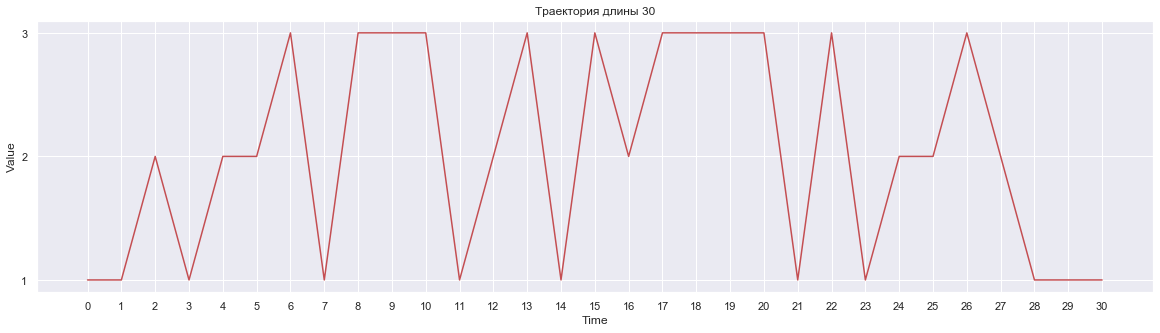

In [69]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(range(31), simulation_3(state1, trans, 30)[1], '-r')
ax.set_title('Траектория длины 30')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_yticks([1, 2, 3])
ax.set_xticks(range(31))
plt.show()

<h3> №4

In [70]:
def markov_time(state, transition_matrix, n):
    
    sample = simulation_3(state, transition_matrix, n)[1]
    time_in = []*3
    for i in range(1, 4):
        time_in.append(np.count_nonzero(sample == i))
        
    index_1 = np.where(sample == 1)[0]
    index_2 = np.where(sample == 2)[0]
    index_3 = np.where(sample == 3)[0]
    
    ret_1, ret_2, ret_3 = [], [], []
    
    for i in range(len(index_1)-1):
        if (index_1[i+1] - index_1[i]) != 1:
            ret_1.append(index_1[i+1] - index_1[i] - 1)
            
    for i in range(len(index_2)-1):
        if (index_2[i+1] - index_2[i]) != 1:
            ret_2.append(index_2[i+1] - index_2[i] - 1)
    
    for i in range(len(index_3)-1):
        if (index_3[i+1] - index_3[i]) != 1:
            ret_3.append(index_3[i+1] - index_3[i] - 1)
            
    return time_in, ret_1, ret_2, ret_3

In [71]:
time_in, ret_1, ret_2, ret_3 = markov_time(state1, trans, 1000)
display(time_in)

[356, 298, 347]

In [72]:
vari = np.array([np.var(ret_1)])
vari = np.append(vari, np.var(ret_2))
vari = np.append(vari, np.var(ret_3))
vari

array([ 5.81716906, 10.61464526,  4.91741059])

In [73]:
(time_in - 1000*state1)/(1000*vari*(state1)**3)**(0.5)

array([ 0.19126922,  0.23624392, -0.40406452])

In [74]:
display(stats.norm.cdf(0.26696031))
display(stats.norm.cdf(-0.33637945))
display(stats.norm.cdf(0.14485783))

0.6052501398101104

0.3682923720333496

0.5575884390235785

In [75]:
np.mean(ret_1)

2.8699551569506725